# Lab 5. Probability functions in R.
You have your favorite shape. It could be a triangle, a circle, or perhaps a fancy one like a fractal. The point is: there are many shapes. I mean, check out all the shapes that bushes can be made into! What we're going to discuss today in this lab is that **data have shapes too**, except we call them **distributions** and there is a corresponding mathematical way we can formulate these shapes.

This will take a leap of thought and perhaps some faith. Let all of the leaves in one of the bushes stand for a data point. Do you see how they can come together and look like a great representation of something, i.e. an elephant? Now, take a look at the histogram... The data points are almost like the green shape that is colored over them, but not quite. The difference between the leaves (data points) and the elephants (the shapes we hope they conform to) is that we can easily describe an elephant rather than the placement of all the single leaves. This makes it easier to come to conclusions. **We use distributions in order to simulate, understand, and make conclusions about values similar to those in our own data.**

We can start answering questions like, based on this mean and that standard deviation, what is the probability of this event actually happening?

Importantly, but not incredibly importantly, *CHECK OUT* that mountain below (does anyone actually know where it is?) and see how **it looks like the density curve above it**! But does the area underneath sum up to 1? :P

![](images/images.001.jpeg)

## Goals
1. Learn `?` or `help()`
2. Learn the arguments for `pbinom`, `qbinom`, `rbinom`, `pnorm`, `qnorm`, `rnorm`
3. Use `pbinom`, `qbinom`, `rbinom`, `pnorm`, `qnorm`, `rnorm` in the context of a word problem

## Note
I'm going to be using `dnorm` and `dbinom` just to show you plots. You will not be using them for lab. For an overview of the functions, see <a href="functions-whiteboard.pdf">this</a>.

In [ ]:
library(ggplot2)
library(reshape2)

## 1. The ? function
First things first, I want you to check out the `?` function. Unlike other functions, we do not need to put any parentheses around what comes after it. Use the help function whenever you don't know what something does.

In [55]:
?help

## 2. "Coin Flipping" with the Binomial Distribution
The binomial distribution which requires **parameters** $n$ and $p$ normally represents events that are like a coin flip -- with **2 possible events in their sample space**. These events are **disjoint** and cannot happen at the same time! We also assume that each trial is **independent** from one another, that each trial has the same probability of success no matter what. Take a look at the following graphs and see how varying $p$ will change the distribution.

$P(X=k) = n choose k (p)^k(1-p)^{n-k}$

In [33]:
x <- 0:100
y <- dbinom(x=x, size=100, prob=0.2)
binom_02 <- data.frame(cbind(x, y))
binom_02 <- cbind(binom_02, p=rep("p=0.2", 101))

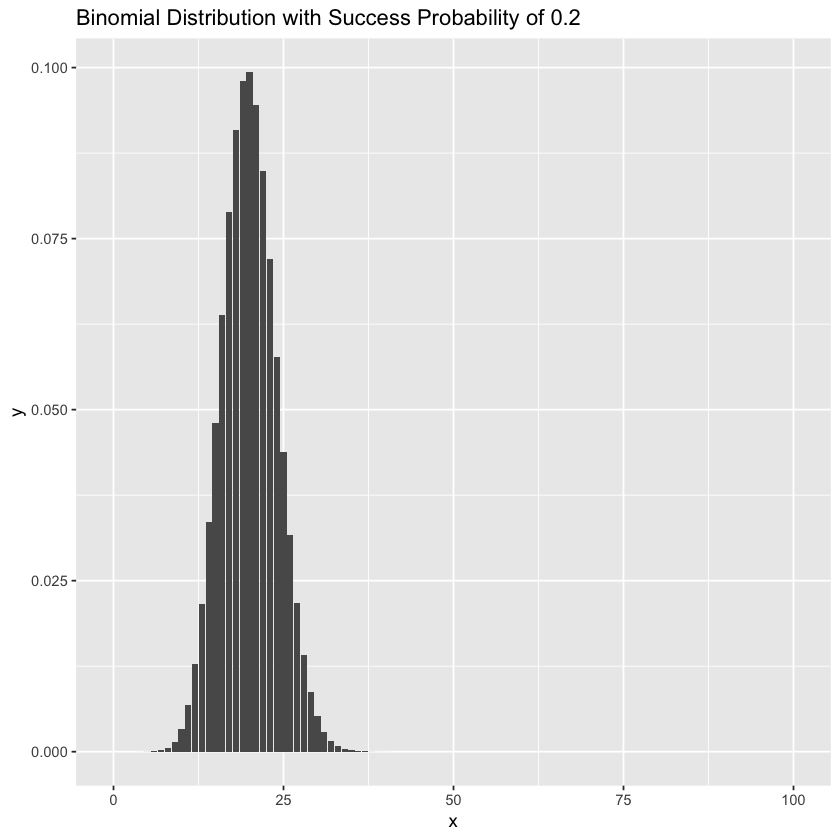

In [51]:
ggplot(binom_02, aes(x=x, y=y)) +
    geom_bar(stat="identity") +
    ggtitle("Binomial Distribution with Success Probability of 0.2")

In [35]:
x <- 0:100
y <- dbinom(x=x, size=100, prob=0.5)
binom_05 <- data.frame(cbind(x,y))
binom_05 <- cbind(binom_05, p=rep("p=0.5", 101))


x <- 0:100
y <- dbinom(x=x, size=100, prob=0.8)
binom_08 <- data.frame(cbind(x,y))
binom_08 <- cbind(binom_08, p=rep("p=0.8", 101))

In [44]:
binom <- rbind(binom_02, binom_05, binom_08)

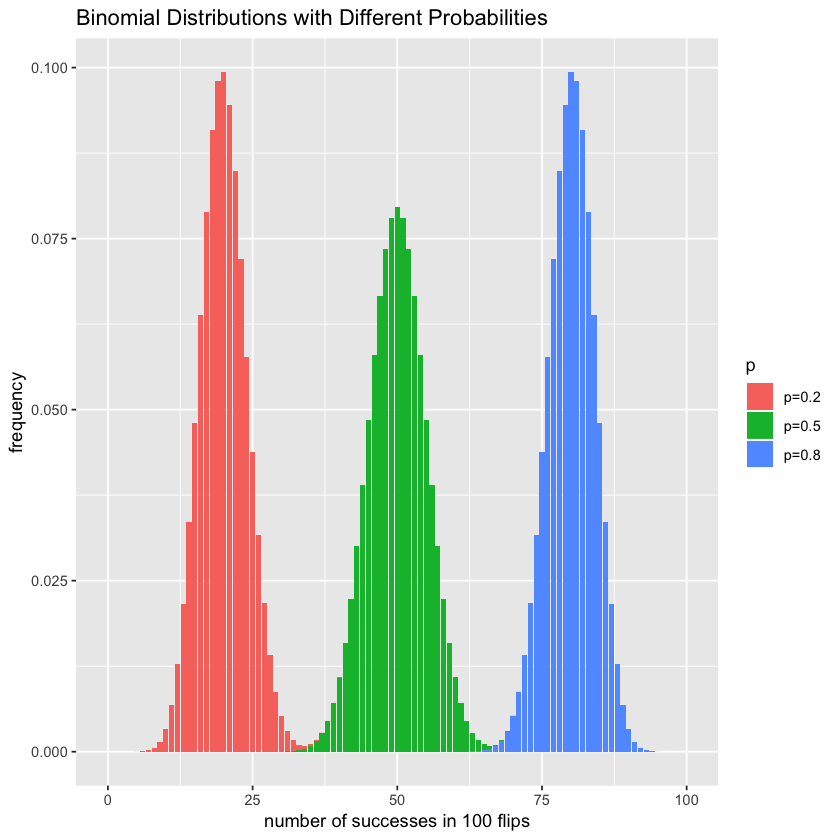

In [53]:
ggplot(binom, aes(x=x, y=y, fill=p)) +
    geom_bar(stat="identity") +
    xlab("number of successes in 100 flips") +
    ylab("frequency") +
    ggtitle("Binomial Distributions with Different Probabilities")

### Binomial Distribution Functions
The functions we want to use for the Binomial distribution are: `rbinom`, `pbinom`, and `qbinom`.

**Here's our scenario.** I want you to imagine a scenario now that we are flipping a weighted coin. The probability that the coin shows heads is 25%. The other 75% of the time, it will show tails. We're going to flip this coin 100 times.

**Generating successes from random sample.** Let's start thinking about the probability scenario we described above. Now, imagine that you have data that follows that distribution, i.e. your data $X$ is distributed $\sim$ as $Bin(n,p) = Bin(100, 0.25)$. The function `rbinom`, which generates sample binomial successes, takes three arguments. The first is `n` which asks you how many times you want to repeat the coin-flipping experiment. The second is `size` which tells you how large your sample size is (in this case, how many flips). The last is `prob` which is the probability of success. When you put it all together, using the below function shows you the numbers of successes you rack up if you repeat the coin-flipping experiment (flipping your weighted coin 100 times) 20 times over.

Because there is randomness in what the 100 flips will be, we're going to set a seed so we can reproduce our results.

In [5]:
set.seed(107)

In [141]:
rbinom(n=20, size=100, prob=0.25)

[1] 24 24 28 20 24 42 25 22 30 23 32 20 25 23 16 27 27 31 24 25

**Answering 'How many "bars of success" do we need to color in to sum up to a probability?'**. Now, let's talk about `pbinom` which helps us answer that question. Functions are somethings called funky things, but this one and the rest of the probability functions were named quite responsibly. The **`p` stands for probability**, and you probably get that **`binom` stands for binomial**.

What the following function does is first generate random data about an experiment of 100 coin flips (again, 25% chance of heads) and then calculates the probability below or equal to 22 successes in 100 coin flips. So, let random variable $X$ be the number of successes in 100 flips of this specific coin.

In math: $P(X \leq 22)$ = `pbinom(q=22, size=100, prob=0.25`).

In [6]:
?pbinom

In [7]:
pbinom(q=22, size=100, prob=0.25)

[1] 0.2863701

**Answering 'How much probability lies below (to the left) of a certain x-value (number of successes)?'**. The following function is the opposite of `pbinom`! Instead of spewing out a probability, it spews out a quantile (a value on the x-axis).

The following function will also generate data for an experiment that requires 100 flips with a 25% chance of success. Then, `qbinom` will tell you which number you need to sum up to in order to receive total area underneath the curve to be 50%.

In [4]:
?qbinom

In [9]:
qbinom(p=0.286370114396107, size=100, prob=0.25)

[1] 22

Notice that this totally matches the result from `pbinom`. Setting my seed was required in order to produce these matching results.

### Binomial Distribution Review
Now that you've read and coded all about the binomial distribution, answer the following. Consult all the resources that you have.

- What kind of data types can we model with the binomial distribution? (i.e. what data type is number of successes?)
- How many different binomial distributions are there?
- What do we have to assume about our data in order to use the binomial distribution? (Our outcomes must be...)

## 3. The Normal Distribution
The normal distribution is used so much. You'll see why in a few lectures, but for those of you who have seen statistics before, *hint hint* it's due to the Central Limit Theorem! Don't fuss about the following code block -- you don't need to use `dnorm` in this class.

In [14]:
# * DON'T TRIP CHOCOLATE CHIP!
# * YOU ARE NOT RESPONSIBLE FOR THIS CODE!
x <- seq(-3.5, 3.5, length=100)
y <- dnorm(x, mean=0, sd=1)
norm_std <- data.frame(cbind(x, y))
norm_std <- data.frame(cbind(norm_std, v=rep("standard (variance=1)", 1000)))

y <- dnorm(x, mean=0, sd=2)
norm_2 <- data.frame(cbind(x, y))
norm_2 <- data.frame(cbind(norm_2, v=rep("variance=2", 1000)))

y <- dnorm(x, mean=0, sd=0.5)
norm_05 <- data.frame(cbind(x, y))
norm_05 <- data.frame(cbind(norm_05, v=rep("variance=0.5", 1000)))

norms <- rbind(norm_std, norm_2, norm_05)

While you are not responsible for the previous code, you should understand the following visual concept. A mean of a number (0 in this case) will be where the center of the distribution will lie. Smaller variance makes the normal curve more peaked. Finally and super importantly, the normal distribution is symmetric. You can use this property *A LOT*!

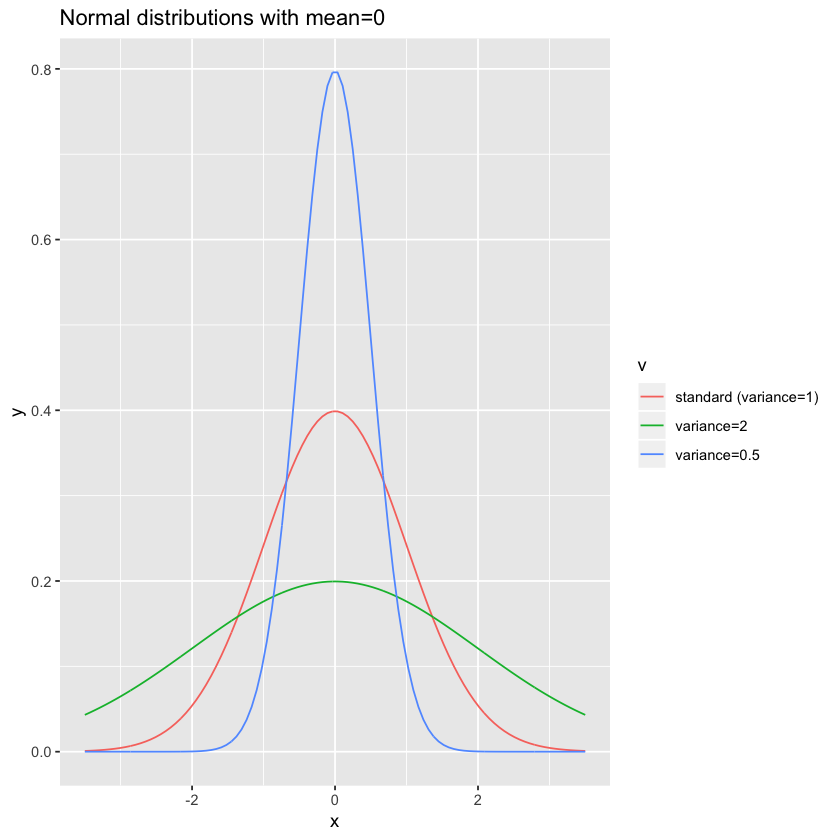

In [134]:
ggplot(norms, aes(x=x, y=y, col=v)) + geom_line() + ggtitle("Normal distributions with mean=0")

**The Empirical Rule** says that approximately:

- $P(x \in [\mu-1\sigma, \mu+1\sigma]) = 0.68$
- $P(x \in [\mu-2\sigma, \mu+2\sigma]) = 0.95$
- $P(x \in [\mu-3\sigma, \mu+3\sigma]) = 0.997$

If this just looked like hieroglyphics to you, then the first line reads "The probability that x is within one standard deviation of the mean is 68%". The rest can be read similarly.

### Normal Distribution Functions
These functions have functionality that is almost like the functions for the binomial distribution, except now we are working with normally distributed data.

If you use `rnorm` with the following parameters, you get 20 randomly sampled numbers from a $N(0,1)$ distribution.

In [11]:
rnorm(n=20, mean=0, sd=1)

[1]  0.46804170  0.28097144 -0.46049568 -0.11957076 -0.38324637  0.61402135
 [7]  0.11368542 -1.27333373 -0.08729225  0.85370074 -0.71617120 -0.74113160
[13]  1.39294212  0.63256679  0.08492899 -0.19422738  0.56333206 -0.93053524
[19]  1.42476899 -1.25350962

On a standard normal distribution, if we sum up all the area underneath the curve from $-\infty$ to $-0.5$, then we would get 30.85% of all of the data.

In [12]:
pnorm(q=-0.5, mean=0, sd=1)

[1] 0.3085375

On a standard normal distribution, if we choose the quantile 0.75 (the number 0.75 on the x-axis), then the probability to the left of this value is 0.67. In math: $P(X \leq 0.75)=0.6745$.

In [13]:
qnorm(p=0.75, mean=0, sd=1)

[1] 0.6744898

**QQ-plots tell you if data are normal or not.** Let's revisit the rappers dataset.

In [23]:
rappers <- read.csv("../../notes/rappers/data/rappers.csv")[,-1]
rappers[seq(from=1, to=nrow(rappers), by=7),]

,legal_name,birth_year,origin,net_worth,start_year,deceased,height
1,Onika-Maraj,1982,New-York,75,2004,FALSE,"5'2"""
8,Jason-Phillips,1975,New-York,6,1991,FALSE,"5'7"""
15,Keenon-Jackson,1969,California,3,2009,FALSE,"5'11"""
22,Jermaine-Cole,1985,New-York,15,2007,FALSE,"6'2"""
29,Andre-Romelle-Young,1965,California,850,1984,FALSE,"6'1"""
36,Curtis-James-Jackson-III,1975,New-York,15,1996,FALSE,"6'0"""
43,Sean-Combs,1969,New-York,825,1990,FALSE,"5'10"""
50,Artist-Julius-Dubose,1995,New-York,5,2016,FALSE,"5'10"""
57,Dwayne-Michael-Carter-Jr.,1982,Louisiana,120,1993,FALSE,"5'5"""
64,Darryl-Matthews-McDaniels,1964,New-York,45,1981,FALSE,"6'1"""


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


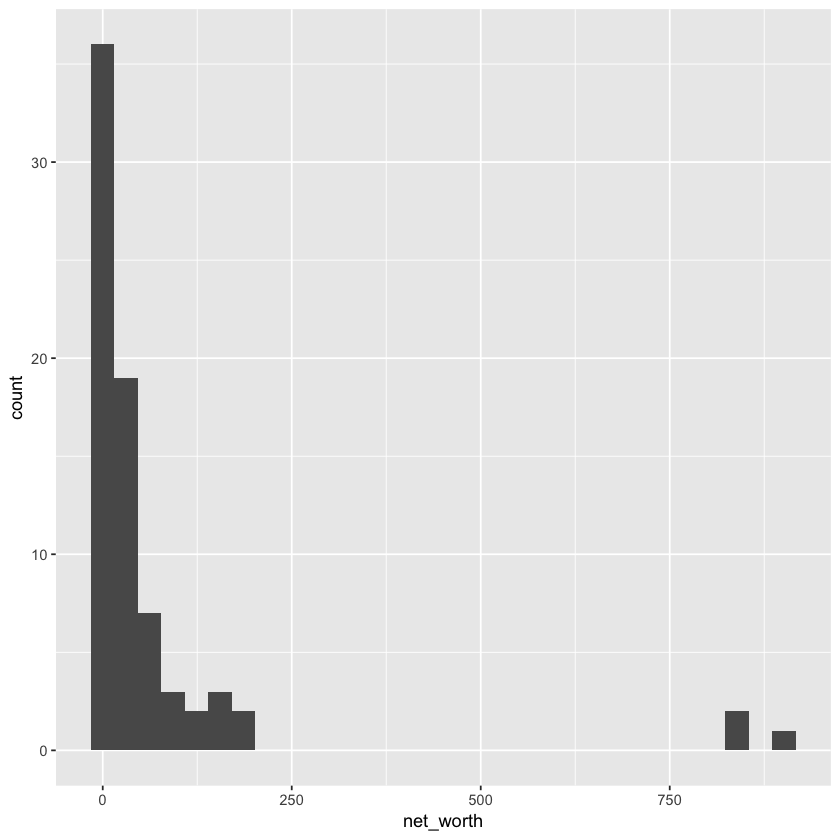

In [49]:
ggplot(rappers, aes(x=net_worth)) + geom_histogram()

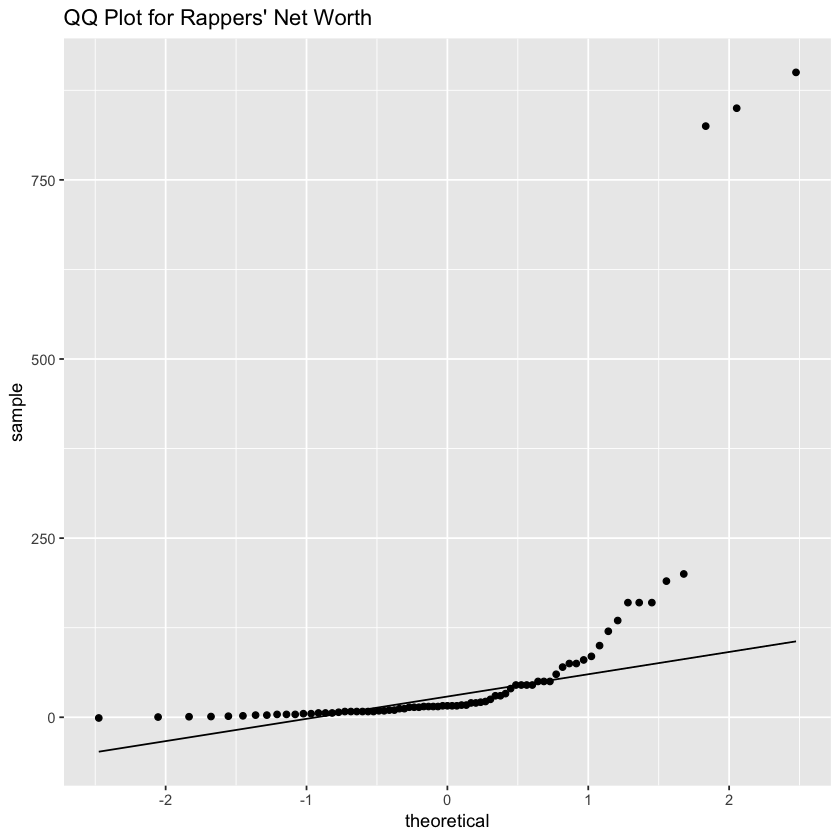

In [30]:
library(ggplot2)
ggplot(rappers, aes(sample = net_worth)) + 
    geom_qq() + 
    geom_qq_line() +
    ggtitle("QQ Plot for Rappers' Net Worth")

### Normal Distribution Review
- What kind of data types can we model with the normal distribution?
- Does the distribution fully capture all of the information in our data?
- What is the empirical rule?
- How would you get from any arbitrary normal distribution to a standard normal distribution?
- If we have a standard normal density curve, how would we get the probability of data points that are below 3 standard deviations? By hand? In R?
- Why is a QQ plot helpful?